In [2]:
!pip install matplotlib pillow


In [15]:
#given an image, shows all bbox ann and the label name

import matplotlib.pyplot as plt
import matplotlib.patches as patches


from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15,15)

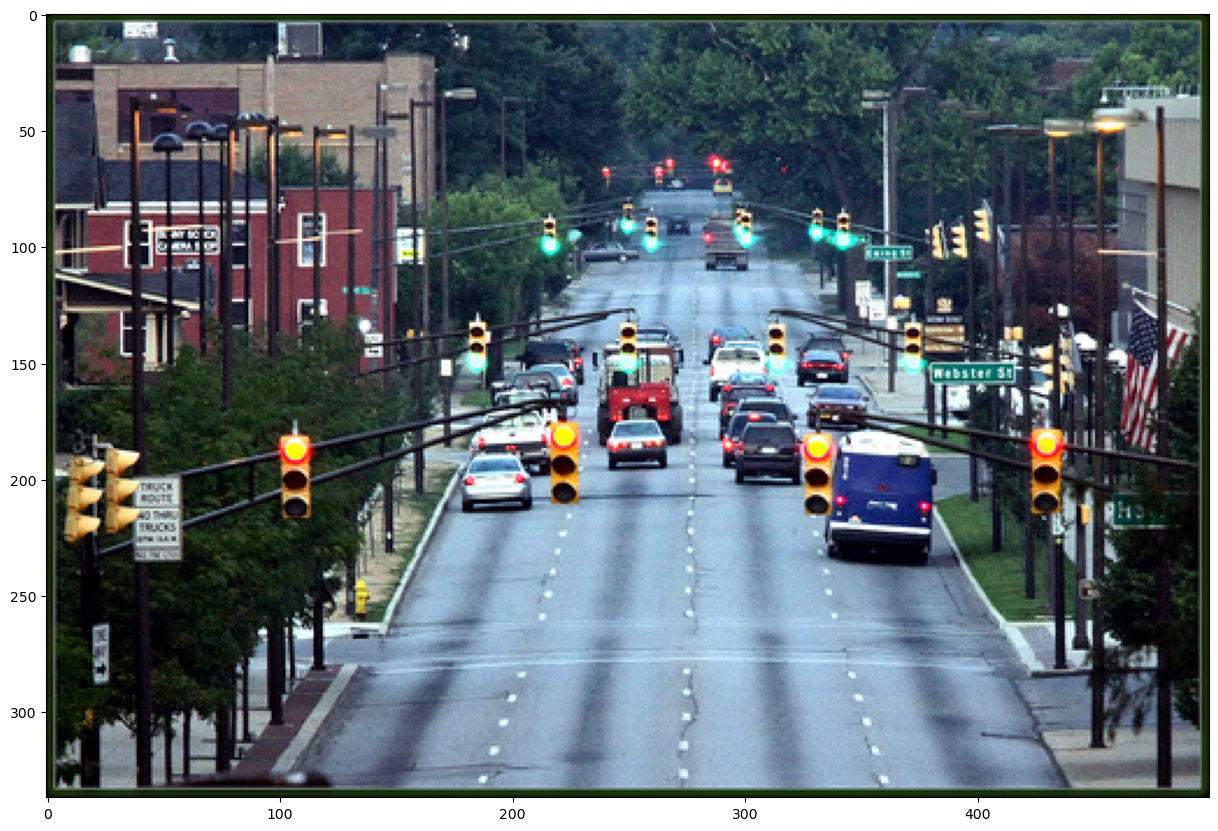

In [16]:
# Show image
image_name = "./coco2017/train2017/000000430122.jpg"
img = Image.open(image_name)

# Resize image to a smaller size while maintaining aspect ratio
max_width = 800
max_height = 800

# Calculate new size while preserving aspect ratio
width, height = img.size
aspect_ratio = width / height

if width > max_width or height > max_height:
    if aspect_ratio > 1:
        new_width = max_width
        new_height = int(max_width / aspect_ratio)
    else:
        new_height = max_height
        new_width = int(max_height * aspect_ratio)

    img = img.resize((new_width, new_height), Image.ANTIALIAS)

fig, ax = plt.subplots()
ax.imshow(img)

In [17]:
image_ids_annotations = defaultdict(list)

# Load annotations
path = './coco2017/annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)

# Add into datastructure
for ann in anns['annotations']:
    image_id = ann['image_id'] # Are integers
    image_ids_annotations[image_id].append(ann)

In [21]:
# Get mapping category_id to category name
catergory_id_to_name = dict()
for ann in anns['categories']:
    catergory_id_to_name[ann['id']] = ann['name']

In [22]:
# #select one image and show annotations
# #coco bbox : x,y,h,w where (x,y) is top left corner and (h,w) is width and height

# image_name = "./coco_train2017/train2017/000000430122.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])
image_id


430122

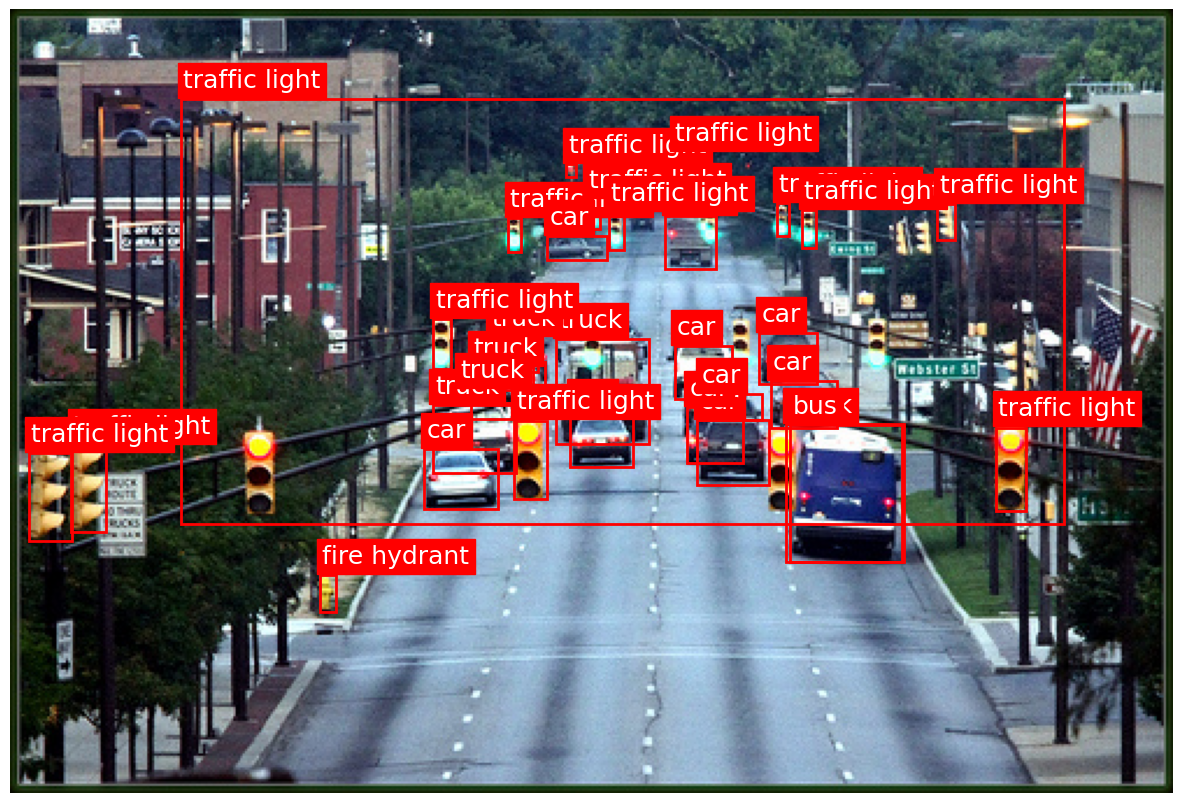

In [23]:
image_name = "./coco2017/train2017/000000430122.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

# Add code to visualize boxes and labels
image_anns = image_ids_annotations[image_id]

# Get all bounding boxes and labels
for image_ann in image_anns:
    bbox = image_ann['bbox'] # Format: x, y, h, w, origin in top left corner
    name = catergory_id_to_name[image_ann['category_id']]

    # Extract bbox coordinates
    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    # Add text and bbox
    plt.text(x+1, y-5, name,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)

ax.axis('off')
ax.imshow(img)
plt.show()